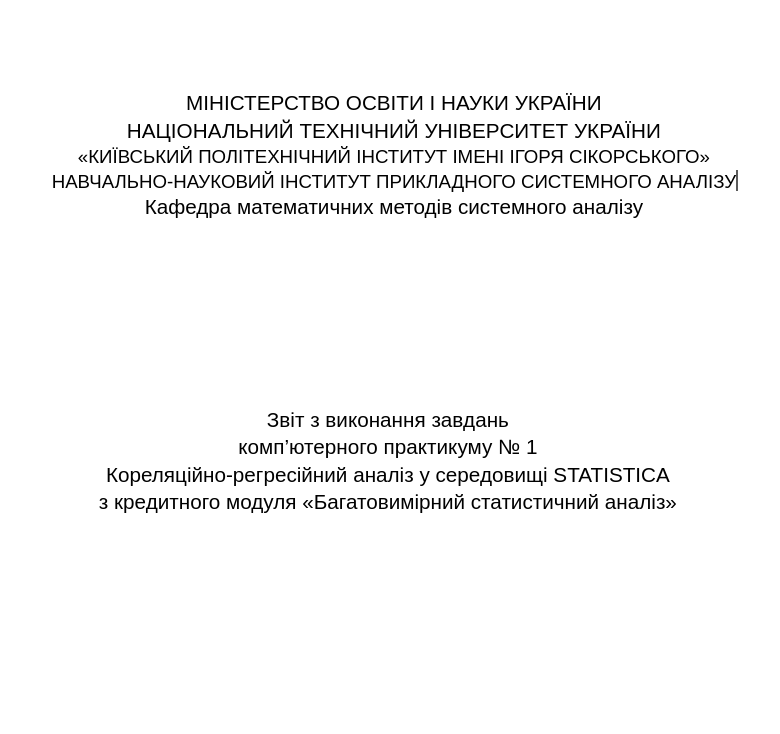

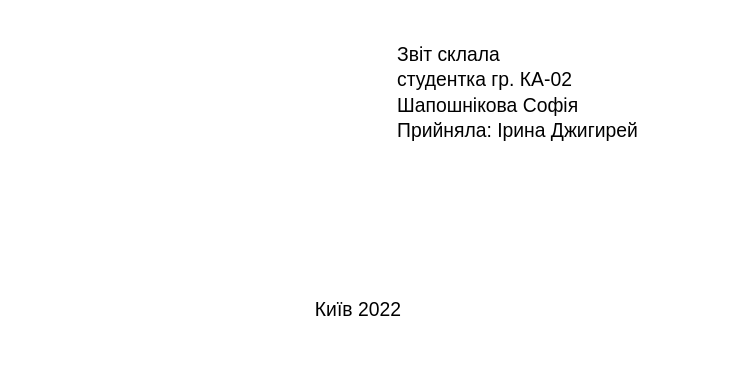

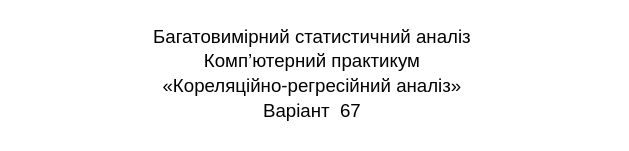

**Мета роботи.** Ознайомитися з інструментарієм кореляційного аналізу в середовищі Statistica.
Завдання. На основі експериментальних даних, які наведено також у вигляді кореляційної таблиці, вивчити залежність між випадковими
величинами X та Y, для чого знайти рівняння прямих ліній регресії Y на X та X на Y та оцінити тісноту зв’язку між величинами X та Y.

**Завдання** На основі експериментальних даних, які наведено також у вигляді кореляційної таблиці, вивчити залежність між випадковими
величинами X та Y, для чого знайти рівняння прямих ліній регресії Y на X та X на Y та оцінити тісноту зв’язку між величинами X та Y.

**Послідовність виконання роботи**
1. Ознайомитись з короткими теоретичними відомостями

2. Відкрити ресурс «Результати експериментів (значення X|Y; варіанти)» дистанційного курсу «Багатовимірний статистичний аналіз» та завантажити файл електронної таблиці згідно індивідуального варіанту, який можна перевірити за ресурсом «Варіанти виконання завдань комп'ютерних практикумів»

In [6]:
# Завантажимо пакет для читання даних з роширенням .xlsx через бібліотеку pandas
!pip install pandas openpyxl

In [2]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib.pyplot as plt
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.preprocessing import StandardScaler

In [3]:
xls = pd.ExcelFile(r"БСА-67.xlsx")

In [4]:
#0 - це номер листа+1 таблиці xlsx, який плануємо зчитати
df = xls.parse(0)

3. Робота з даними
- Відкрити завантажену електронну таблицю. 
- Зобразити дві діаграми розсіювання
- На діаграмі додатково зобразити отримане вибіркове рівняння прямої лінії регресії Y на X
- Зобразити значення коефіцієнта кореляції продукту-моменту Пірсона.

In [5]:
# Виведемо перші 10 рядків таблиці
df.head(10)

,X,Y
0,10.2,74.95
1,10.4,67.17
2,11.8,65.05
3,11.9,65.15
4,12.1,81.24
5,12.3,79.48
6,12.3,77.97
7,12.4,64.36
8,12.6,80.81
9,12.8,74.64


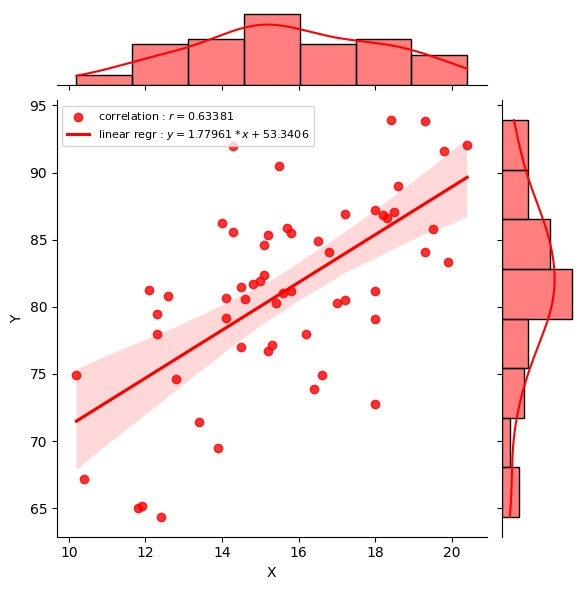

In [6]:
slope, intercept, r_value, pv, se = sci.stats.linregress(df['X'], df['Y'])
sns.jointplot(data=df, y="Y", x="X", kind="reg", color='red')
plt.legend(labels=['correlation : $r=%3.7s$'%(r_value), 'linear regr : $y=%3.7s*x+%3.7s$'%(slope, intercept)], 
           loc = 'upper left', fontsize=8)

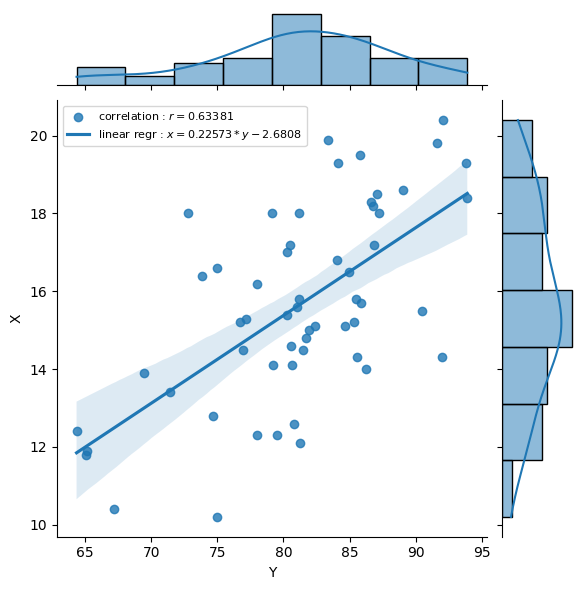

In [7]:
slope, intercept, r_value, pv, se = sci.stats.linregress(df['Y'], df['X'])
sns.jointplot(data=df, y="X", x="Y", kind="reg")
plt.legend(labels=['correlation : $r=%3.7s$'%(r_value), 'linear regr : $x=%3.7s*y%3.7s$'%(slope, intercept)],
          loc = 'upper left', fontsize=8)

4. Отримання характеристик випадкових величин X та Y:
- середнє (арифметичне) значень
- стандартне відхилення 
- коефіцієнт кореляції

 Виведемо таблицю характеристик випадкових величин

In [8]:
df.describe()

,X,Y
count,56.000000,56.000000
mean,15.644643,81.182143
std,2.502357,7.026117
min,10.200000,64.360000
25%,14.100000,77.767500
50%,15.450000,81.210000
75%,18.000000,85.782500
max,20.400000,93.900000


Виведемо кореляційну матрицю

In [9]:
df.corr()

,X,Y
X,1.000000,0.633812
Y,0.633812,1.000000


5. scatterplot matrix (2D і 3D гістограми для згрупованих даних)

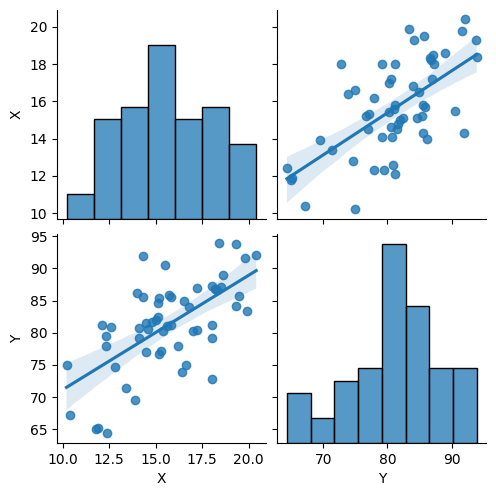

In [10]:
sns.pairplot(df, kind="reg")

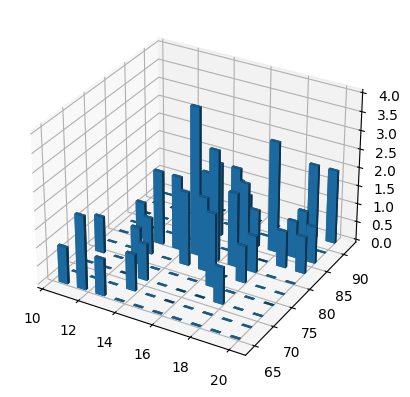

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(df["X"], df["Y"])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

6. Стандартизація даних

In [34]:
scaler = StandardScaler()

In [46]:
df["X_standard"] = scaler.fit_transform(np.array(df["X"]).reshape(-1, 1))

Як бачимо, нам вдалося стандартизувати дані: середньоквадратичне відхилення дорівнює одиниці, а середнє - нулю:

In [50]:
np.std(df["X_standard"])

1.0

In [51]:
round(np.mean(df["X_standard"]))

0

Порівняємо графіки розсіювання:

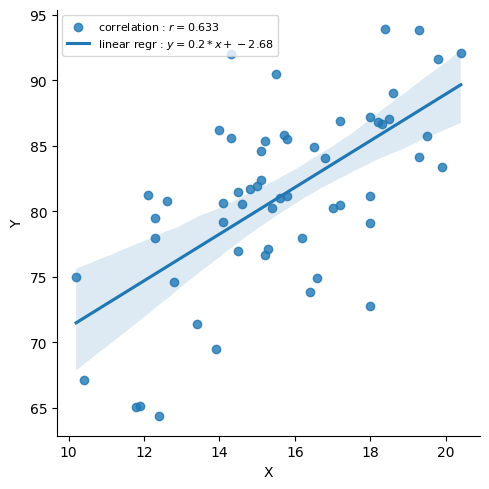

In [70]:
slope, intercept, r_value, pv, se = sci.stats.linregress(df['Y'], df['X'])
sns.lmplot(data=df,x="X", y="Y")
plt.legend(labels=['correlation : $r=%3.5s$'%(r_value), 'linear regr : $y=%3.3s*x+%3.5s$'%(slope, intercept)], 
           loc = 'upper left', fontsize=8)

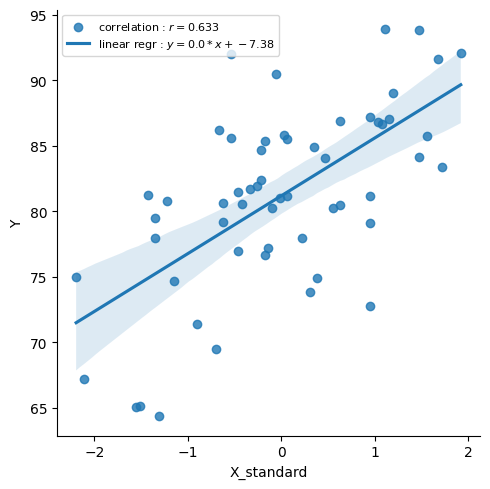

In [69]:
slope, intercept, r_value, pv, se = sci.stats.linregress(df['Y'], df['X_standard'])
sns.lmplot(data=df,x="X_standard", y="Y")
plt.legend(labels=['correlation : $r=%3.5s$'%(r_value), 'linear regr : $y=%3.3s*x+%3.5s$'%(slope, intercept)], 
           loc = 'upper left', fontsize=8)

7.  Визначити вигляд функцій регресії та оцінити тісноту кореляційного зв’язку за допомогою кореляційної та допоміжних таблиць, для чого можна скористатись застосунком MS Excel, Open Office Calc або іншим, або виконати розрахунки без використання застосунків. В електронний звіт необхідно додати кореляційну та допоміжні таблиці та короткі висновки щодо можливості використання згрупованих даних для грубого оцінювання параметрів функцій регресії й тісноти кореляційного зв’язку двох випадкових величин.

Відкриємо ресурс «Кореляційна таблиця (варіанти)» (URL: https://do.ipo.kpi.ua/mod/resource/view.php?id=131323) дистанційного курсу «Багатовимірний статистичний аналіз»

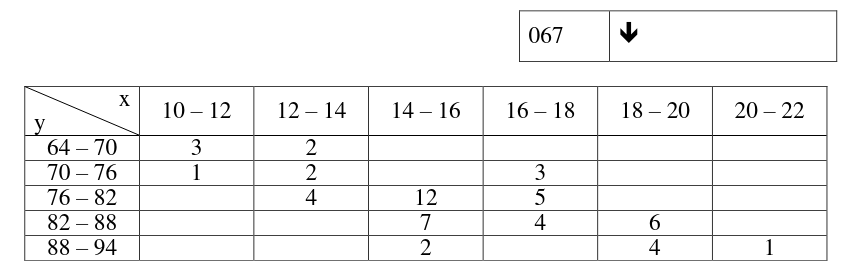

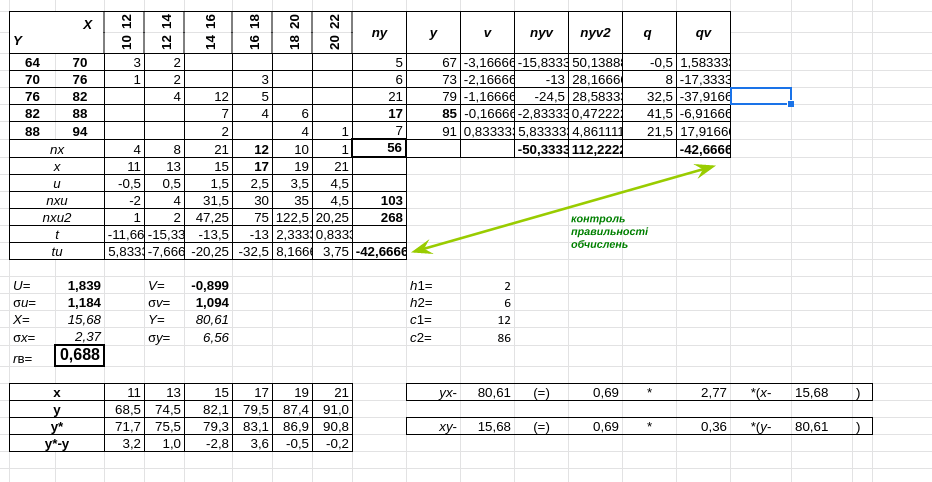

### Висновки
На мій погляд, найкраще використовувати мови програмування, накшталт Python або R для проведення дослідницького аналізу даних, адже вони мають достатньо бібліотек та пакетів, які дозволяють розробляти власний або налаштовувати готовий функціонал під свої задачі.
Порівняємо використання згрупованих даних тдля грубого оцінювання параметрів з отриманими значеннями на всіх даних.
Отримуємо різницю в значеннях, наприклад коефіцієнт кореляції 0.633812 на повному наборі даних та 0,688 на згрупованому. Отже, бачимо, що згруповані дані показують гіршу точність.